In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product

# 데이터 선정

데이터는 2021년 1월부터 2022년 상반기까지의 일별 데이터를 준비하였다. 주간 판매량을 예측하기 위해 일별데이터를 주별데이터로 변경한 결과, 총 78개의 데이터로 분석을 진행하였다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 경로 입력
data = pd.read_csv('/content/진라면_data.csv', parse_dates=['day'], index_col='day')

# SARIMA 주기 입력 (일주일이라면 '7')
seasonal = 7

def sum_of_squared_errors(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    sse = np.sum(squared_errors)
    return sse

def mean_squared_error(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

def root_mean_squared_error(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse

def mean_absolute_error(y_true, y_pred):
    absolute_errors = np.abs(y_true - y_pred)
    mae = np.mean(absolute_errors)
    return mae

In [ ]:
data

,price
day,
1,600
2,800
3,1320
4,1080
5,1760
...,...
74,2600
75,1080
76,1320


# EDA(Exploratory data analysis)

## Box Plot을 사용한 이상치 제거

Box Plot을 사용한 이상치 제거를 진행하였다. 이상치를 탐색하는데 IQR을 사용하였으며 IQR는  Q3-Q1의 값과 같다. 일반적으로 IQR을 사용한 이상치의 기준은 Q1-1.5*IQR보다 작거나 Q3+1.5*IQR보다 크다면 이상치로 판단한다. 이번에 사용된 데이터에 대해서도 같은 기준으로 이상치를 탐색하여 제거한다.

## 시계열 정상성(Stationarity) 확인

ACF(Autocorrelation Function, 자기상관 함수)와 PACF(Partial Autocorrelation Function, 부분 자기상관 함수) 플롯을 보았을 때 정상성을 지키는 것을 볼 수 있다. 따라서, 본 데이터에 대한 예측모델로 Arima를 선정하였고, Arima에 계절성을 추가한 Sarima와 비교하여 두 모델에 어떤 차이가 있는지를 관측하고자 한다. 하지만, 위의 플롯은 완전하게 정상성을 지킨다고 볼 수는 없다. 따라서 비정상성 데이터 예측에 적합한 ETS(Exponential Smoothing)을 사용하여 Arima 기반 예측 결과와 비교하고자 한다. 결과적으로 시계열 분석에 사용된 모델은 Arima, Sarima, ETS 세 가지이다

## 그리드 탐색

Arima, Sarima 파라미터 최적값을 도출하기 위해 그리드 탐색을 근거로 P, Q, D 값을 찾고자 한다.

p: AR(자동회귀) 차수로, 이전 시간 단계의 관측치를 사용하여 현재 시간 단계의 값을 예측하는데 사용되는 회귀 항목의 수를 나타낸다. p 값이 클수록 모델은 더 많은 이전 관측치를 고려하여 예측을 수행한다.

d: 차분 차수로 현재 관측치와 이전 관측치 간의 차이를 계산하는데 사용되며, 시계열 데이터의 정상성을 확보하기 위해 필요한 차수이다. d 값이 클수록 차분 차수가 높아지며, 보다 안정적인 시계열을 생성 가능하다.

q: MA(이동평균) 차수로 이전 시간 단계의 예측 오차를 사용하여 현재 시간 단계의 값을 예측하는데 사용되는 이동평균 항목의 수를 나타내며, q 값이 클수록 모델은 더 많은 이전 예측 오차를 고려하여 예측 수행한다. 너무 크면 모델이 불안정할 수 있다.

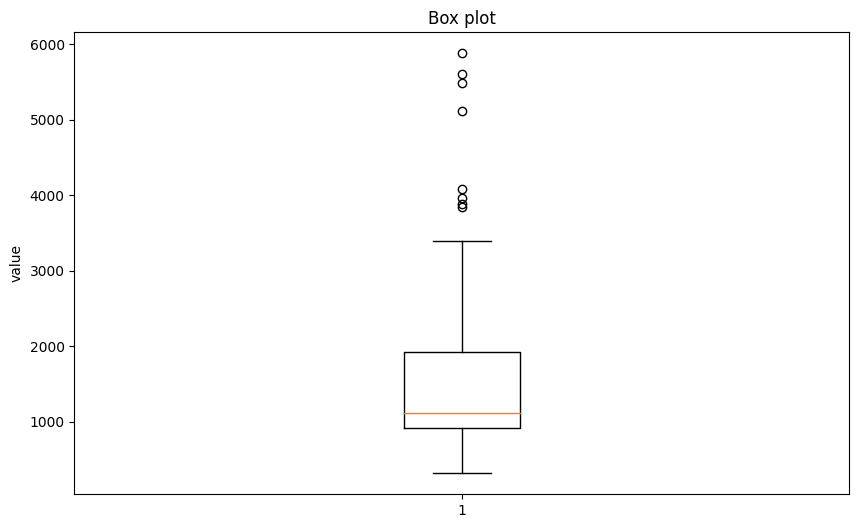

low: -580.0
high: 3420.0
lower than low outlier: Int64Index([], dtype='int64', name='day')
higher than high outlier: Int64Index([11, 20, 21, 29, 35, 46, 47, 53], dtype='int64', name='day')


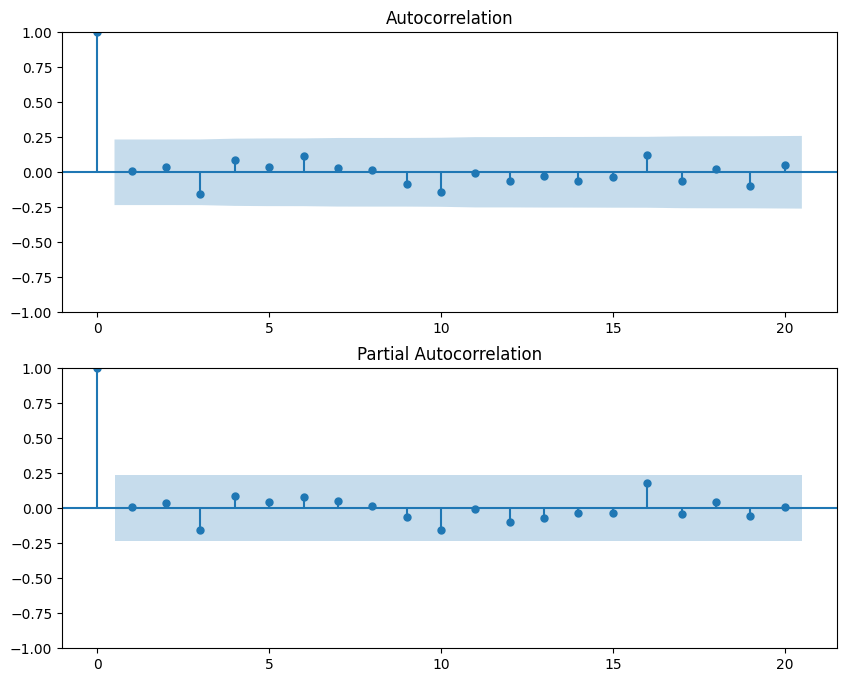

0
0
0
0
0
0
0
0
0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1
1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
1
1
1
1
1
1
2
2
2
2
2
2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2
2
2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC: 1095.3804553723664
p, d, q 값: (0, 2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df = data

# Box Plot을 사용한 이상치 제거
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'])
plt.title('Box plot')
plt.ylabel('value')
plt.show()

Q1 = data['price'].quantile(q=0.25)
Q3 = data['price'].quantile(q=0.75)
IQR = Q3-Q1

low_outlier = Q1-1.5*IQR
high_outlier = Q3+1.5*IQR

print("low:", low_outlier)
print("high:", high_outlier)

low_indexes = data[data['price'] < low_outlier].index
high_indexes = data[data['price'] > high_outlier].index
print("lower than low outlier:", low_indexes)
print("higher than high outlier:", high_indexes)


# 입력한 인덱스들에 해당하는 행들을 데이터프레임에서 제거합니다
low_valid_indices = [idx for idx in low_indexes if 0 <= idx < len(df)]

for i in low_valid_indices:
    df.drop(i, inplace=True)


high_valid_indices = [idx for idx in high_indexes if 0 <= idx < len(df)]
for i in high_valid_indices:
    df.drop(i, inplace=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data, lags=20, ax=ax1)
plot_pacf(data, lags=20, ax=ax2)
plt.show()


p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
results_list=[]
# 그리드 탐색
best_aic = float('inf')
best_params = None

for p, d, q in product(p_values, d_values, q_values):
    try:
        print(p)
        model = ARIMA(np.asarray(data), order=(p, d, q))
        results = model.fit()
        aic = results.aic
        # 결과를 딕셔너리로 저장
        result_dict = {'p': p, 'd': d, 'q': q, 'aic': aic}
        results_list.append(result_dict)
    except:
        continue

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results_list)

# 결과 데이터프레임을 CSV 파일로 저장
results_df.to_csv('arima_results.csv', index=False)

for p, d, q in product(p_values, d_values, q_values):
    try:
        model = ARIMA(np.asarray(data), order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (p, d, q)
    except:
        continue


print("AIC:", best_aic)
print("p, d, q 값:", best_params)


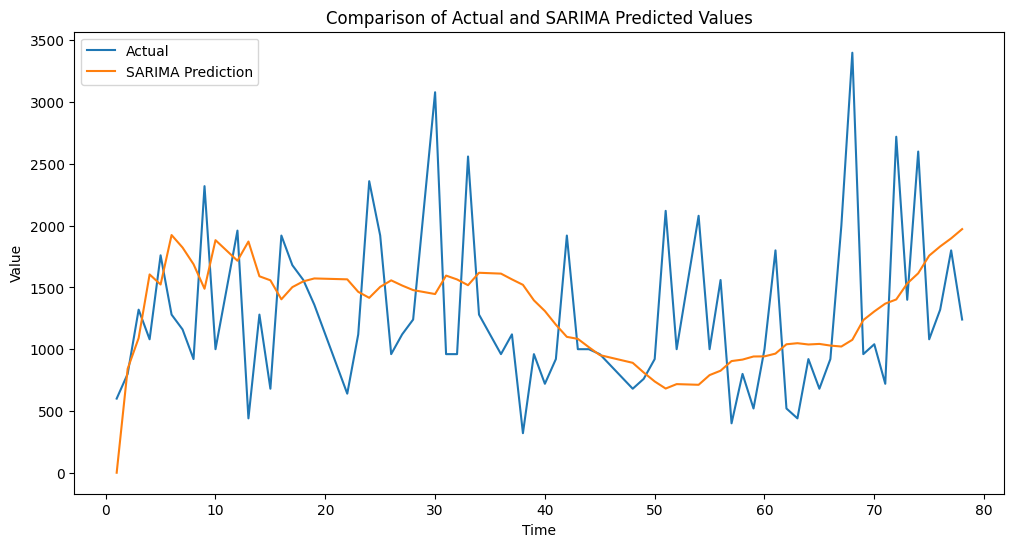

Sum of Squared Errors: 35130047.05448592
Mean Squared Error: 501857.81506408454
Root Mean Squared Error: 708.4192367970286
Mean Absolute Error: 555.9956068072738


In [ ]:
# ARIMA
p, d, q = best_params
model = ARIMA(np.asarray(data), order=(p, d, q))
results_arima = model.fit()

forecast_steps = 26
forecast_arima = results_arima.forecast(steps=forecast_steps)
start_index = len(data)
forecast_arima = pd.Series(forecast_arima, index=range(start_index, start_index + len(forecast_arima)))

data_df = pd.DataFrame({'원래값': data['price'], 'ARIMA 예측값': results_arima.fittedvalues,})
data_df.to_csv('Arima.csv', index=True)

sse_result = sum_of_squared_errors(data['price'], results_arima.fittedvalues)
mse_result = mean_squared_error(data['price'], results_arima.fittedvalues)
rmse_result = root_mean_squared_error(data['price'], results_arima.fittedvalues)
mae_result = mean_absolute_error(data['price'], results_arima.fittedvalues)

plt.figure(figsize=(12, 6))
plt.plot(data_df['원래값'], label='Actual')
plt.plot(data_df['ARIMA 예측값'], label='SARIMA Prediction')
plt.legend()
plt.title('Comparison of Actual and SARIMA Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

print("Sum of Squared Errors:", sse_result)
print("Mean Squared Error:", mse_result)
print("Root Mean Squared Error:", rmse_result)
print("Mean Absolute Error:", mae_result)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

AIC: 1095.3804553723664
p, d, q 값: (0, 2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


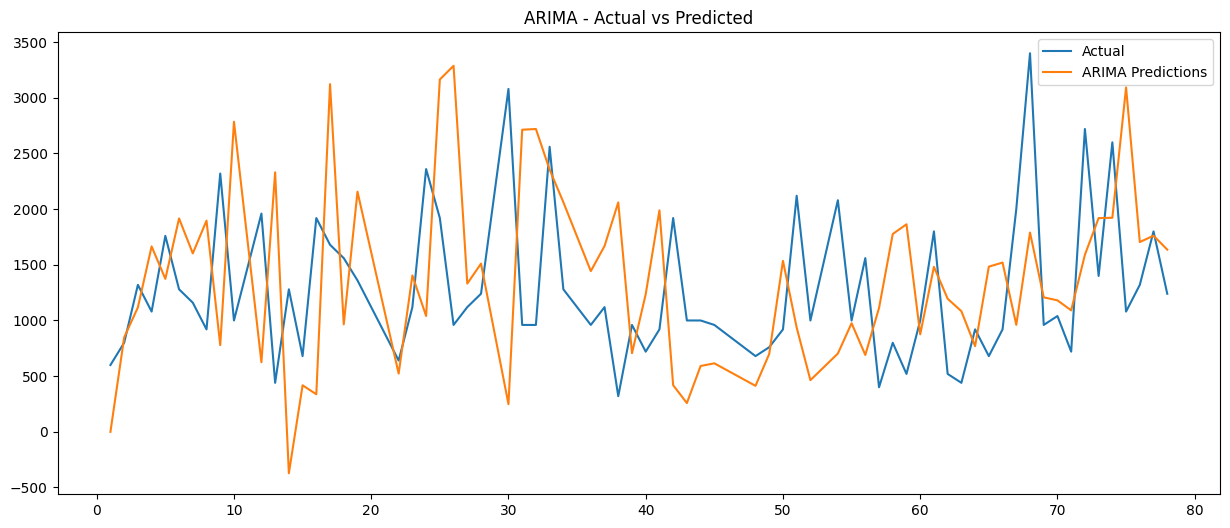

Sum of Squared Errors: 73971543.21687478
Mean Squared Error: 1056736.3316696398
Root Mean Squared Error: 1027.9768147529592
Mean Absolute Error: 818.9817594368806


In [ ]:
# 딕셔너리에 저장된 모든 AIC 값을 출력합니다.
# 그리드 탐색
best_aic = float('inf')
best_params = None

for p, d, q in product(p_values, d_values, q_values):
    try:
        model = ARIMA(np.asarray(data), order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (p, d, q)
    except:
        continue

print("AIC:", best_aic)
print("p, d, q 값:", best_params)

order = best_params
best_list=list(best_params)
best_list.append(seasonal)
seasonal_params = tuple(best_list)
seasonal_order = seasonal_params

model_sarima = SARIMAX(data['price'], order=order, seasonal_order=seasonal_order)
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.get_forecast(steps=26)
forecast_mean_sarima = forecast_sarima.predicted_mean

data_df = pd.DataFrame({'original': data['price'], 'predict': result_sarima.fittedvalues,})
data_df.to_csv('Sarima.csv', index=True)

sse_result = sum_of_squared_errors(data['price'], result_sarima.fittedvalues)
mse_result = mean_squared_error(data['price'], result_sarima.fittedvalues)
rmse_result = root_mean_squared_error(data['price'], result_sarima.fittedvalues)
mae_result = mean_absolute_error(data['price'], result_sarima.fittedvalues)


plt.figure(figsize=(15, 6))
plt.plot(data['price'], label='Actual')
plt.plot(result_sarima.fittedvalues, label='ARIMA Predictions')
plt.title('ARIMA - Actual vs Predicted')
plt.legend(loc='best')
plt.show()

print("Sum of Squared Errors:", sse_result)
print("Mean Squared Error:", mse_result)
print("Root Mean Squared Error:", rmse_result)
print("Mean Absolute Error:", mae_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


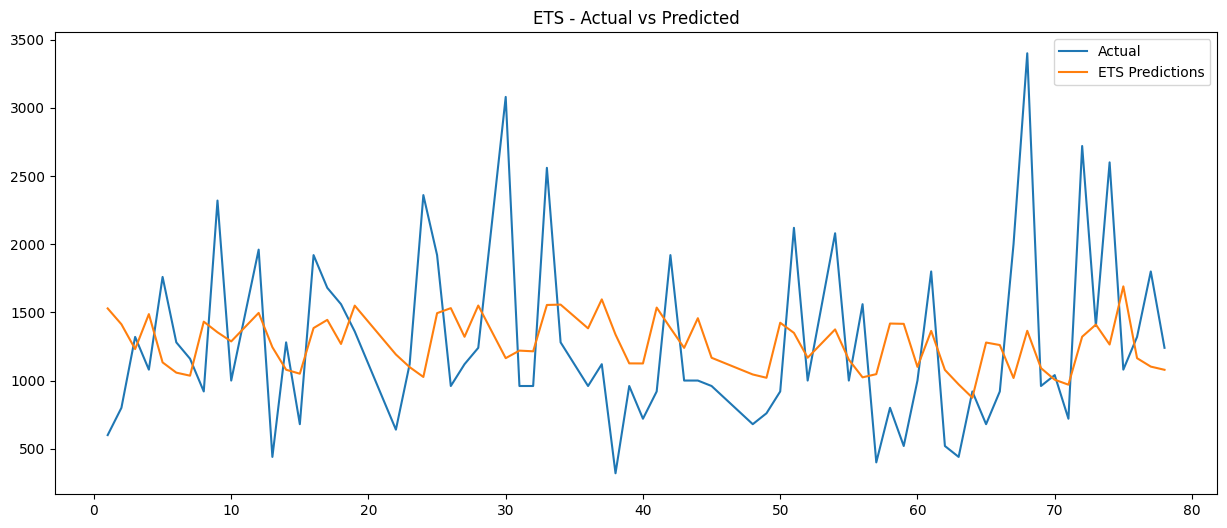

Sum of Squared Errors: 29466199.452180818
Mean Squared Error: 420945.706459726
Root Mean Squared Error: 648.8032879538497
Mean Absolute Error: 508.1108536862128


In [ ]:
# ETS
model_ets = ExponentialSmoothing(data['price'], seasonal='add', seasonal_periods=7)
result_ets = model_ets.fit()
forecast_steps = 26
forecast_ets = result_ets.forecast(steps=forecast_steps)

data_df = pd.DataFrame({'original': data['price'], 'predict': result_ets.fittedvalues,})
data_df.to_csv('ETS.csv', index=True)

sse_result = sum_of_squared_errors(data['price'], result_ets.fittedvalues)
mse_result = mean_squared_error(data['price'], result_ets.fittedvalues)
rmse_result = root_mean_squared_error(data['price'], result_ets.fittedvalues)
mae_result = mean_absolute_error(data['price'], result_ets.fittedvalues)

plt.figure(figsize=(15, 6))
plt.plot(data['price'], label='Actual')
plt.plot(result_ets.fittedvalues, label='ARIMA Predictions')
plt.title('ARIMA - Actual vs Predicted')
plt.legend(loc='best')
plt.show()

print("Sum of Squared Errors:", sse_result)
print("Mean Squared Error:", mse_result)
print("Root Mean Squared Error:", rmse_result)
print("Mean Absolute Error:", mae_result)

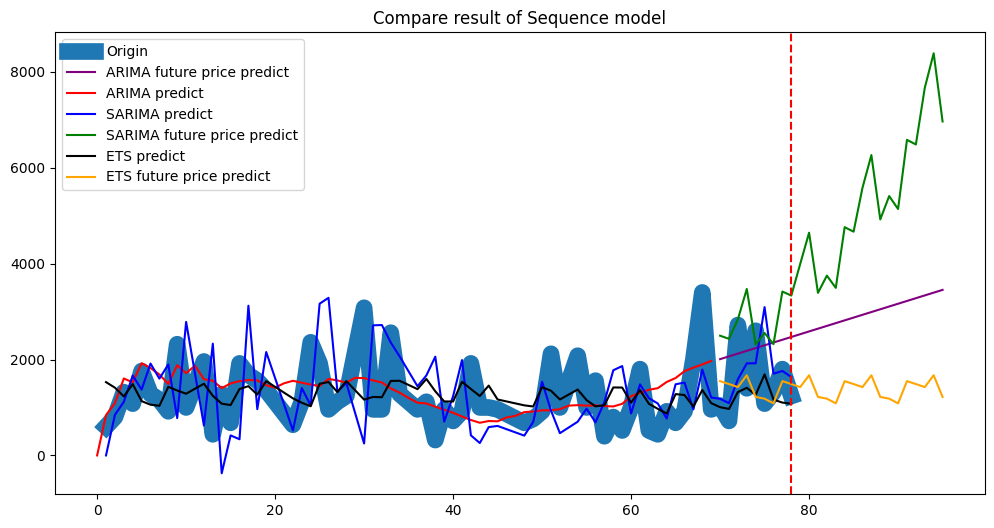

In [ ]:
# 원래값과 각 모델별 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['price'], label='Origin', linewidth = '12')
plt.plot(forecast_arima, color='purple', label='ARIMA future price predict')
plt.plot(results_arima.fittedvalues, color='red', label='ARIMA predict')
plt.plot(result_sarima.fittedvalues, color='blue', label='SARIMA predict')
plt.plot(forecast_mean_sarima, color='green', label='SARIMA future price predict')
plt.plot(result_ets.fittedvalues, color='black', label='ETS predict')
plt.plot(forecast_ets, color='orange', label='ETS future price predict')
plt.legend()
plt.title('Compare result of Sequence model')

# 예측 시작 지점에 구분선 추가
predict_start = data.index[-1]
plt.axvline(predict_start, color='red', linestyle='--', label='Prediction Start')
plt.show()

시계열 데이터 활용 예측 ML의 예측률 파악을 위해 네 가지 지표를 활용하였고, ETS가 모든 지표에서 가장 성능이 높은 것을 확인하였다.

|     |SSE|MSE|RMSE|MAE|
|-----|---|---|----|---|
|Arima|7930589.09|152511.3|390.5|276.65|
|Sarima|12452506.5|239471.2|489.3|349.5|
|ETS|7303961.5|140460.7|374.7|259.4|

## SSE

'Sum of Squared Errors'의 약어로 데이터 포인트들과 모델의 예측값 사이의 차이를 제곱하여 더한 값이다. 회귀 분석에서 모델의 예측값과 실제 데이터 포인트 사이의 차이를 측정하는데 사용된다. SSE는 회귀 모델이 얼마나 데이터에 잘 적합되었는지를 평가하는 지표로, 값이 작을수록 데이터를 더 정확하게 설명하고 있는 것을 의미한다.

## MSE

'Mean Squared Error'의 약어로 데이터 포인트들과 모델의 예측값 사이의 차이를 제곱하여 평균한 값이다. 회귀 분석에서 모델의 예측값과 실제 데이터 포인트 사이의 차이를 측정하고, 이를 제곱하여 평균한 값으로 모델의 예측 오차를 평가한다. MSE 값이 작을수록 모델이 데이터를 더 정확하게 예측하고 있는 것을 의미하며, 보통 MSE는 예측 오차의 크기를 수치화하여 모델 성능을 평가하는데 사용된다. 일반적으로 작을수록 더 좋은 모델 성능을 나타낸다고 평가할 수 있다.

## RMSE

Root Mean Squared Error'의 약어로 MSE 값에 제곱근을 취한 값이다. 회귀 분석에서 모델의 예측값과 실제 데이터 포인트 사이의 차이를 제곱하여 평균한 값의 제곱근으로 예측 오차의 평균적인 크기를 나타내는 지표로 사용된다. RMSE 값이 작을수록 모델이 데이터를 더 정확하게 예측하고 있는 것을 의미하며, MSE와 마찬가지로 모델의 성능을 평가하는데 사용된다.

## MAE

'Mean Absolute Error'의 약어로 모델의 예측값과 실제 데이터 포인트 사이의 절댓값 차이를 평균한 값이다. 회귀 분석에서 예측 오차의 크기를 평가하는 지표로 사용되며, 각 예측값과 실제 값 사이의 차이를 절댓값으로 변환하여 평균한 값이다. MAE 값이 작을수록 모델이 데이터를 더 정확하게 예측하고 있는 것을 의미한다.



모든 지표에서 ETS가 가장 예측률이 높은 것을 확인할 수 있음
